<a href="https://colab.research.google.com/github/Farhana-afrin/Python-Classwork-/blob/main/Lecture_05_Python_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classwork

### Lecture 5: Handling Missing values
Instructor: Md Shahidullah Kawsar
<br> Data Scientist, IDARE, Houston, TX, USA

### Objectives:
- performing data cleaning
- data visualization of missing values
- string to datetime conversion
- removing missing values
- replacing missing values by: 1. mean, 2. median, 3. constant, 4. interpolation, 5. forward imputation, 6. backward imputation

### References:
[1] time-series / date functionality: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
<br> [2] dataframe slicing: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
<br> [3] Offset aliases: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases
<br> [4] removing missing values: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
<br> [5] Working with missing data: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

### Import the required libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

#### Reading data file

In [14]:
# from google.colab import files
# uploaded=files.upload()

Saving gre_score.xlsx to gre_score (1).xlsx


In [15]:
df=pd.read_excel("gre_score.xlsx", sheet_name = "Sheet1", engine="openpyxl")

In [16]:
display(df)
print(df.info)
print (df.shape)
display(df.describe())

,date,verbal_score,quant_score
0,2021-09-01,0.0,1.0
1,2021-09-02,1.0,2.0
2,2021-09-03,2.0,3.0
3,2021-09-04,3.0,NaN
4,2021-09-05,4.0,NaN
5,2021-09-06,NaN,NaN
6,2021-09-07,NaN,7.0
7,2021-09-08,7.0,8.0
8,2021-09-09,8.0,9.0
9,2021-09-10,9.0,10.0


<bound method DataFrame.info of         date  verbal_score  quant_score
0 2021-09-01           0.0          1.0
1 2021-09-02           1.0          2.0
2 2021-09-03           2.0          3.0
3 2021-09-04           3.0          NaN
4 2021-09-05           4.0          NaN
5 2021-09-06           NaN          NaN
6 2021-09-07           NaN          7.0
7 2021-09-08           7.0          8.0
8 2021-09-09           8.0          9.0
9 2021-09-10           9.0         10.0>
(10, 3)


,verbal_score,quant_score
count,8.000000,7.000000
mean,4.250000,5.714286
std,3.370036,3.638419
min,0.000000,1.000000
25%,1.750000,2.500000
50%,3.500000,7.000000
75%,7.250000,8.500000
max,9.000000,10.000000


#### Checking for missing values

In [17]:
# method 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          10 non-null     datetime64[ns]
 1   verbal_score  8 non-null      float64       
 2   quant_score   7 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 368.0 bytes


In [18]:
# method 2
display(df.isna())
display(df.isna().sum())

,date,verbal_score,quant_score
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,True
4,False,False,True
5,False,True,True
6,False,True,False
7,False,False,False
8,False,False,False
9,False,False,False


date            0
verbal_score    2
quant_score     3
dtype: int64

In [19]:
# method 3
display(df.notna())
print(df.notna().sum())

,date,verbal_score,quant_score
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,False
4,True,True,False
5,True,False,False
6,True,False,True
7,True,True,True
8,True,True,True
9,True,True,True


date            10
verbal_score     8
quant_score      7
dtype: int64


#### How to convert from string column to datetime column

In [20]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          10 non-null     datetime64[ns]
 1   verbal_score  8 non-null      float64       
 2   quant_score   7 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 368.0 bytes


None

In [21]:
df['date']=pd.to_datetime(df['date'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          10 non-null     datetime64[ns]
 1   verbal_score  8 non-null      float64       
 2   quant_score   7 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 368.0 bytes


None

In [22]:
display(df)

,date,verbal_score,quant_score
0,2021-09-01,0.0,1.0
1,2021-09-02,1.0,2.0
2,2021-09-03,2.0,3.0
3,2021-09-04,3.0,NaN
4,2021-09-05,4.0,NaN
5,2021-09-06,NaN,NaN
6,2021-09-07,NaN,7.0
7,2021-09-08,7.0,8.0
8,2021-09-09,8.0,9.0
9,2021-09-10,9.0,10.0


#### How to set index

In [23]:
df=df.set_index('date')
display(df)
print(df.shape)

,verbal_score,quant_score
date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,NaN
2021-09-05,4.0,NaN
2021-09-06,NaN,NaN
2021-09-07,NaN,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


(10, 2)


In [24]:
# plt.plot(data.index,data['verbal_score',label='verbal',])

In [25]:
df1=df.dropna()
display(df1)

,verbal_score,quant_score
date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0
2021-09-10,9.0,10.0


In [26]:
df.loc['09-01-2021':'09-08-2021',['verbal_score']]

,verbal_score
date,
2021-09-01,0.0
2021-09-02,1.0
2021-09-03,2.0
2021-09-04,3.0
2021-09-05,4.0
2021-09-06,NaN
2021-09-07,NaN
2021-09-08,7.0


In [27]:
df.iloc[:8,[0]]

,verbal_score
date,
2021-09-01,0.0
2021-09-02,1.0
2021-09-03,2.0
2021-09-04,3.0
2021-09-05,4.0
2021-09-06,NaN
2021-09-07,NaN
2021-09-08,7.0


In [28]:
print(df.columns)
print(df.index)

Index(['verbal_score', 'quant_score'], dtype='object')
DatetimeIndex(['2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04',
               '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08',
               '2021-09-09', '2021-09-10'],
              dtype='datetime64[ns]', name='date', freq=None)


In [29]:
# print(df.verbal_score)
# print(df['verbal_score'])
# print(df.verbal_score.values)
# print(df['verbal_score'].values)

#### Create a function for plotting

In [30]:
# plt.plot(df.index,df.verbal_score.values, label='verbal',marker='o')
# plt.plot(df.index,df.quant_score.values, label='quant',marker='o')

# plt.xticks(rotation=90)
# plt.ylabel("score")
# plt.legend()


In [31]:
def tsp(data,title):
    plt.plot(data.index,data.verbal_score.values, label='verbal',marker='o')
    plt.plot(data.index,data.quant_score.values, label='quant',marker='o')
    
    plt.xticks(rotation=90)
    plt.ylabel("score")
    plt.legend()
    plt.title(title)

#### Removing missing values

In [32]:
df_drop_all_nan=df.dropna()
display(df_drop_all_nan)
display(df_drop_all_nan.info())

,verbal_score,quant_score
date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0
2021-09-10,9.0,10.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-09-01 to 2021-09-10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   verbal_score  6 non-null      float64
 1   quant_score   6 non-null      float64
dtypes: float64(2)
memory usage: 144.0 bytes


None

In [33]:
print('mean of verbal score = ',df['verbal_score'].mean())
print(df_drop_all_nan['verbal_score'].mean())

mean of verbal score =  4.25
4.5


#### Replacing missing values by mean

In [34]:
df_mean=df.fillna(df.mean())
# display(df_mean)
display(df_mean.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-09-01 to 2021-09-10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   verbal_score  10 non-null     float64
 1   quant_score   10 non-null     float64
dtypes: float64(2)
memory usage: 540.0 bytes


None

#### Replacing missing values by median

In [35]:
df_median=df.fillna(df.median())
display(df_median)
display(df_median.info())

,verbal_score,quant_score
date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,7.0
2021-09-05,4.0,7.0
2021-09-06,3.5,7.0
2021-09-07,3.5,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-09-01 to 2021-09-10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   verbal_score  10 non-null     float64
 1   quant_score   10 non-null     float64
dtypes: float64(2)
memory usage: 540.0 bytes


None

#### Replacing missing values by constant

In [36]:
df_zero=df.fillna(0)
display(df_zero)
display(df_zero.info())

,verbal_score,quant_score
date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,0.0
2021-09-05,4.0,0.0
2021-09-06,0.0,0.0
2021-09-07,0.0,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-09-01 to 2021-09-10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   verbal_score  10 non-null     float64
 1   quant_score   10 non-null     float64
dtypes: float64(2)
memory usage: 540.0 bytes


None

#### Replacing missing values by interpolation

In [37]:
df_interpolate=df.fillna(df.interpolate())
display(df_interpolate)
display(df_interpolate.info())

,verbal_score,quant_score
date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,4.0
2021-09-05,4.0,5.0
2021-09-06,5.0,6.0
2021-09-07,6.0,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-09-01 to 2021-09-10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   verbal_score  10 non-null     float64
 1   quant_score   10 non-null     float64
dtypes: float64(2)
memory usage: 540.0 bytes


None

##### Replacing missing values  by forward imputation

In [38]:
df_forward=df.fillna(df.ffill())
display(df_forward)


,verbal_score,quant_score
date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,3.0
2021-09-05,4.0,3.0
2021-09-06,4.0,3.0
2021-09-07,4.0,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


Replacing missing values by backward imputation

In [39]:
df_backward=df.fillna(df.bfill())
display(df_backward)


,verbal_score,quant_score
date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,7.0
2021-09-05,4.0,7.0
2021-09-06,7.0,7.0
2021-09-07,7.0,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


#### Plotting 3 x 3 

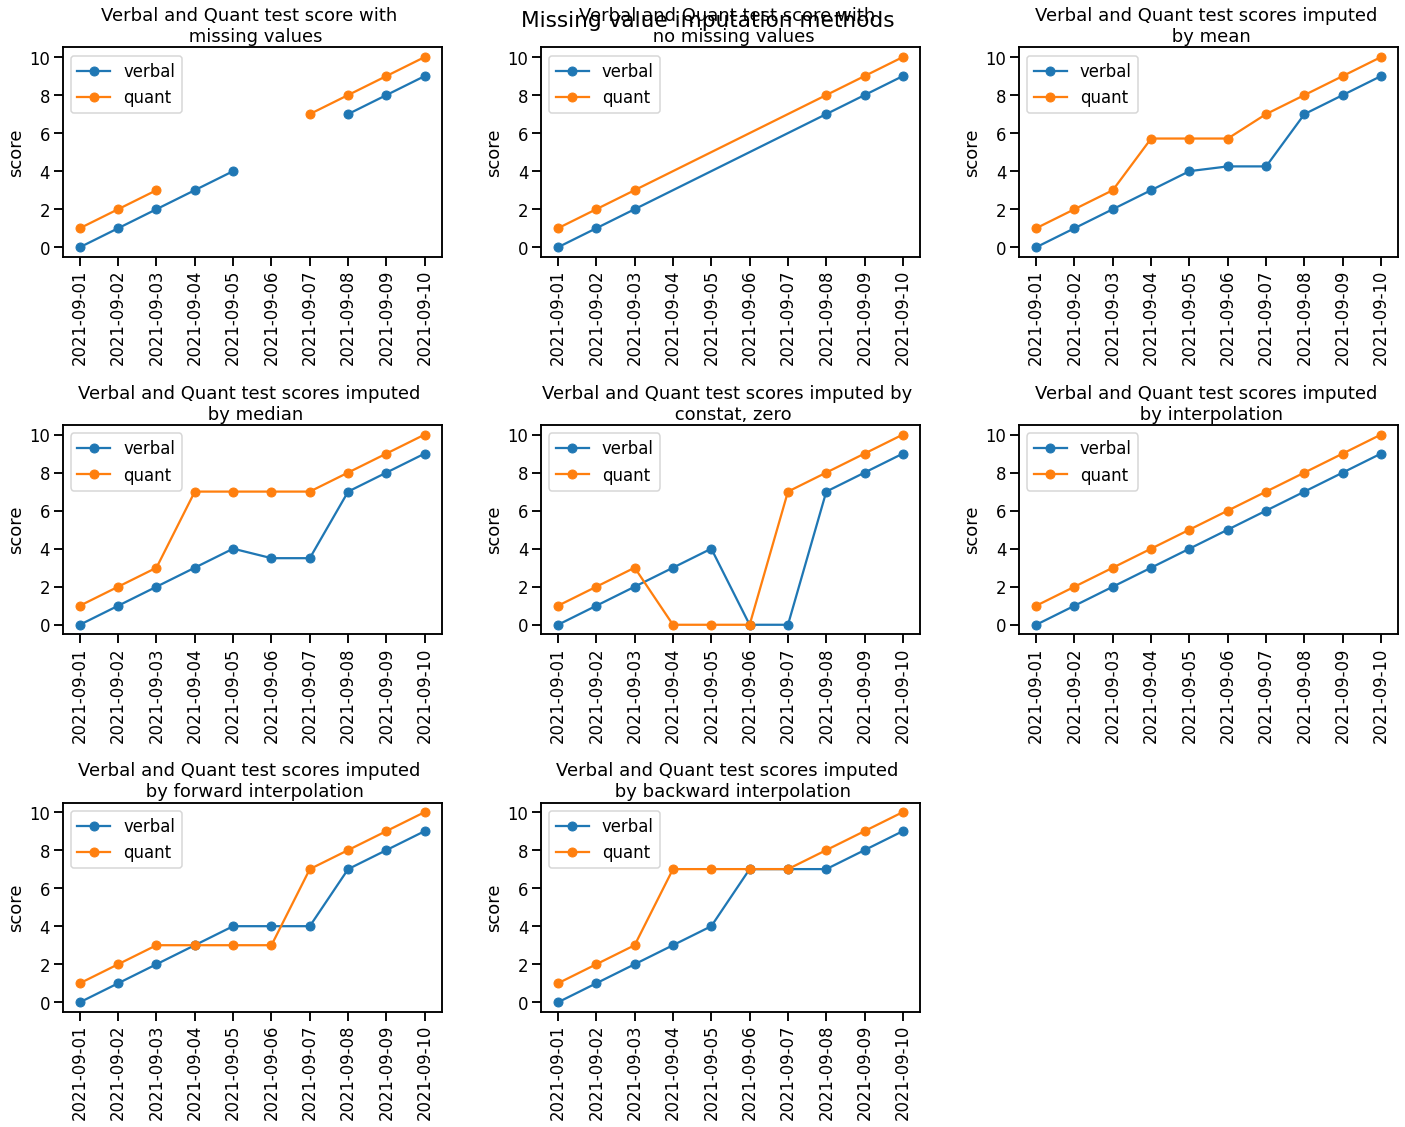

In [40]:
plt.figure(figsize=(20,16))

plt.subplot(3,3,1)
tsp(df,'Verbal and Quant test score with \n missing values')

plt.subplot(3,3,2)
tsp(df_drop_all_nan,"Verbal and Quant test score with \n no missing values")

plt.subplot(3,3,3)
tsp(df_mean,"Verbal and Quant test scores imputed \n by mean")

plt.subplot(3,3,4)
tsp(df_median,"Verbal and Quant test scores imputed \n by median")


plt.subplot(3,3,5)
tsp(df_zero,"Verbal and Quant test scores imputed by \n constat, zero")

plt.subplot(3,3,6)
tsp(df_interpolate,"Verbal and Quant test scores imputed \n by interpolation")

plt.subplot(3,3,7)
tsp(df_forward,"Verbal and Quant test scores imputed \n by forward interpolation")

plt.subplot(3,3,8)
tsp(df_backward,"Verbal and Quant test scores imputed \n by backward interpolation")

plt.suptitle("Missing value imputation methods")
plt.tight_layout()
plt.show()

